# Homework 3 - 2D Cellular Automata

Upload the completed notebook with *firstname_lastname-HW3*.

Remember: code needs to be implemented in your own words. No copy-pasting. 

## Excercise 1 

Build an `update` function that takes a numpy array of 0s and 1s and implements the game of life rules on it using wrap-around boundary conditions. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def update(x):
    rows,cols = x.shape
    xnew = np.zeros(x.shape)
    
    for i, j in np.ndindex(x.shape): 
        left = j-1 if j-1 >= 0 else cols-1
        right = j+1 if j+1 < cols else 0
        up = i-1 if i-1 >= 0 else rows-1
        down = i+1 if i+1 < rows else 0
        
        total = (x[i, left] #left
                 + x[i, right]  #right
                 + x[up, j]  #up
                 + x[down, j]  #down
                 + x[up, left] #up left
                 + x[up, right] #up right
                 + x[down, left] #down left
                 + x[down, right]) #down right
        
        if x[i,j] == 1: # look and see if the current cell is alive (if alive...)
            
            if (total < 2) or (total > 3): # over population and underpopulation
                xnew[i,j] = 0
            else: # any cell with 2 or 3 neighbors
                xnew[i,j] = 1
        
        else: # equivalent to if x[i,j] == 0
            
            if total == 3: # condition of birth
                xnew[i,j] = 1
            else:
                xnew[i,j] = 0

    return xnew



## Excercise 2
Use the `plant_seed` function provided to place the follow a glider (also provided) on a 20x20 grid. Animate the glider forward in time 100 generations.  

In [ ]:
    
def ceil(a, b):
    return -(-a // b)

def plant_seed(seed, nrow, ncol):
    soil = np.zeros((nrow, ncol))
    start_row = (nrow - seed.shape[0]) // 2
    start_col = (ncol - seed.shape[1]) // 2
    soil[start_row: start_row + seed.shape[0], 
         start_col: start_col + seed.shape[1]] = seed
    
    return soil


    

    
glider = np.array([[0,1,0],
[0,0,1],
[1,1,1]])

universe = plant_seed(glider, 20, 20)

for i in range(100):
    
    plt.figure(figsize = (20,20))
    plt.imshow(universe, cmap='gray')
    universe=update(universe)

## Excercise 3

Bacterial populations have been shown to compete in a real-life rock paper scissors game that results in complex dynamics. 

If you want to learn more about this see *Benjamin Kerr, Margaret A. Riley, Marcus W. Feldman & Brendan J. M. Bohannan. Local dispersal promotes biodiversity in a real-life game of rock-paper-scissors*

Simulate these competing bacterial populations using a 3 state, 2D CA where the states are 0, 1, and 2. Use the rock-paper-scissors rule where 1 beats 0, 2 beats 1, and 0 beats 2. 

Make the rule set such that each cell plays against all cells in its neighborhood and adopts the state of any cell that beats it. 

Use the Moore neighborhood (https://en.wikipedia.org/wiki/Moore_neighborhood) and wraparound boundary conditions. 

Simulate both random initial conditions and sectored initial conditions, meaning 3 quadrants of 0,1,2.





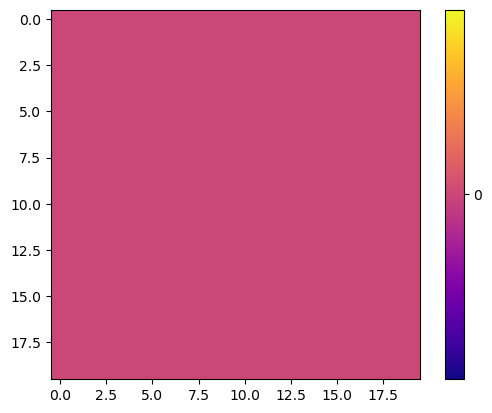

In [71]:

#rock paper scissors
def fistpalmpeace(a, b):
    rows, cols = a.shape
    a2 = np.zeros((rows, cols), dtype=np.int8)
    for i in range(b):
        for row in range(rows):
            for col in range(cols):
                total = [a[row-1, col-1], a[row-1, col], a[row-1, (col+1)%cols],
                             a[row, col-1], a[row, (col+1)%cols],
                             a[(row+1)%rows, col-1], a[(row+1)%rows, col], a[(row+1)%rows, (col+1)%cols]]
                cd = np.argmax(np.bincount(total))
                a2[row, col] = cd
        a = a2
    return a2


# random initial conditions
def initial(rows, cols):
    return np.random.randint(0, 3, size=(rows, cols), dtype=np.int8)

a = initial(20, 20)
a2 = fistpalmpeace(a, 100)

plt.imshow(a2, cmap='plasma')
plt.colorbar(ticks=[0, 1, 2])
plt.show()


#probably doesn't work but hopefully you can see the vision

# Excercise 4: Extra Credit (Not optional for graduate students)
Review this week's reading entitled *Cellular Automata Approaches to Biological Modeling*.
Implement the Young Model, the coupled oscillator model, or a Growth Automata model (such as diffusion limited aggregation). Comment on how your simulation could be used to increase intuition on the biological phenomenon simulated.


Please state who you worked with: